<CENTER>
    <img src="https://www.opportunitiesforafricans.com/wp-content/uploads/2016/11/ictp-696x222.png" alt="Satellite image of three hurricanes" width="40%">
</CENTER>

# Example of using 2D histogram for simple analysis of satellite images
arturos@cern.ch

##### Source of the data

###### Satellite pictures used in the example
* https://www.ncdc.noaa.gov/gibbs/availability/2018-01-01
   * https://www.ncdc.noaa.gov/gibbs/html/GOE-13/WV/2018-01-01-00
   * https://www.ncdc.noaa.gov/gibbs/html/GOE-13/WV/2018-01-01-03


Getting input two IR images

In [9]:
TASImage image_1("javier.jpg");
UInt_t yPixels_1 = image_1.GetHeight();
UInt_t xPixels_1 = image_1.GetWidth();
UInt_t *argb_1   = image_1.GetArgbArray();

TASImage image_2("asela.jpg");
UInt_t yPixels_2 = image_2.GetHeight();
UInt_t xPixels_2 = image_2.GetWidth();
UInt_t *argb_2   = image_2.GetArgbArray();

input_line_68:2:11: error: redefinition of 'image_1'
 TASImage image_1("javier.jpg");
          ^
input_line_37:2:11: note: previous definition is here
 TASImage image_1("javier.jpg");
          ^


Defining histograms

In [10]:
TH2D* h_image_1 = new TH2D("h_image_1","Satellite image of before",xPixels_1,-1,1,yPixels_1,-1,1);
TH2D* h_image_2 = new TH2D("h_image_2","Satellite image of after",xPixels_2,-1,1,yPixels_2,-1,1);

input_line_69:2:8: error: redefinition of 'h_image_1'
 TH2D* h_image_1 = new TH2D("h_image_1","Satellite image of before",xPix...
       ^
input_line_39:2:8: note: previous definition is here
 TH2D* h_image_1 = new TH2D("h_image_1","Satellite image of before",xPix...
       ^


Creating a 2D map with each of the input images

In [11]:
float entriesInPixel= 0;

for (int row=0; row<xPixels_1; ++row)
{
    for (int col=0; col<yPixels_1; ++col)
    {
        int index_1 = col*xPixels_1+row;
        int index_2 = col*xPixels_2+row;
        
        float indexvalue1 = float(argb_1[index_1]);
        float indexvalue2 = float(argb_2[index_2]);
        //float greyScale = float(argb_1[index_1]&0xff)/256;
        //float greyScale = float(argb_2[index_2]&0xff)/256;
        
        if(indexvalue1 > entriesInPixel)
        {
            h_image_1->SetBinContent(row+1,yPixels_1-col,indexvalue1);
            h_image_2->SetBinContent(row+1,yPixels_2-col,indexvalue2);
        }
    }
}

input_line_70:2:8: error: redefinition of 'entriesInPixel'
 float entriesInPixel= 0;
       ^
input_line_40:2:8: note: previous definition is here
 float entriesInPixel= 0;
       ^


Draw those 2D histograms/maps

In [12]:
%jsroot on

input_line_71:2:2: error: expected expression
 %jsroot on
 ^
input_line_71:2:3: error: use of undeclared identifier 'jsroot'
 %jsroot on
  ^


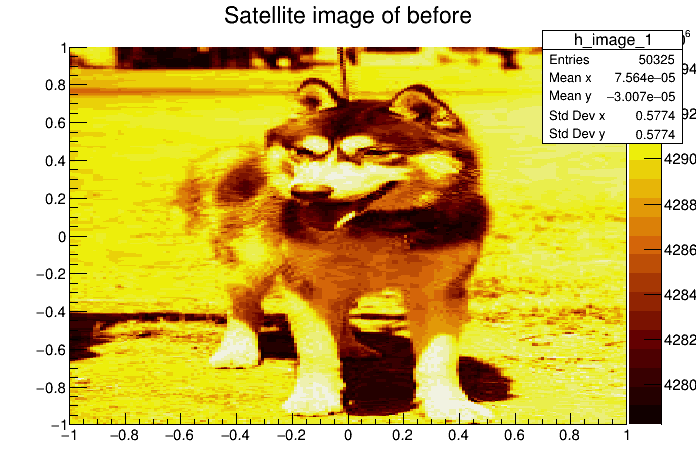

In [13]:
h_image_1->Draw("colz");
c1->Draw();

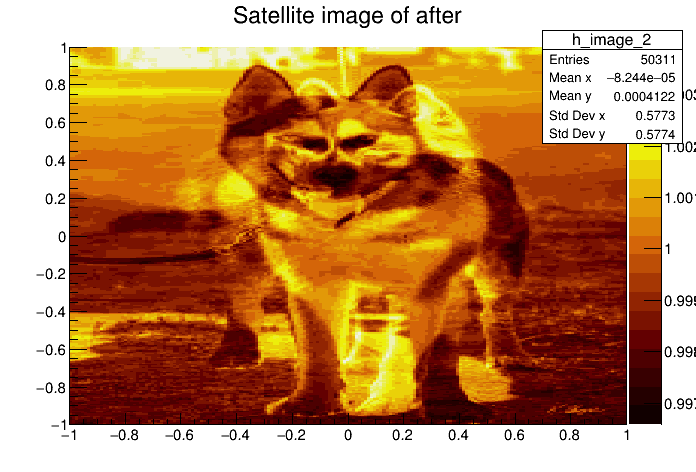

In [14]:
h_image_2->Draw("colz");
c1->Draw();

Let's make the ratio between boths

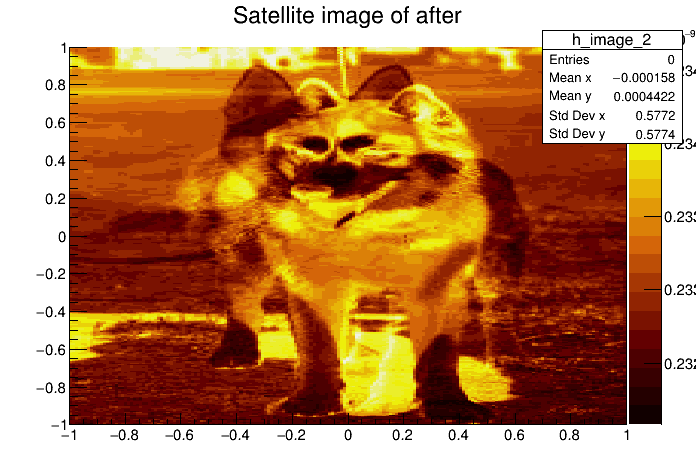

In [15]:
h_image_2->Divide(h_image_1);

h_image_2->Draw("colz");

c1->Draw();

Applying another style

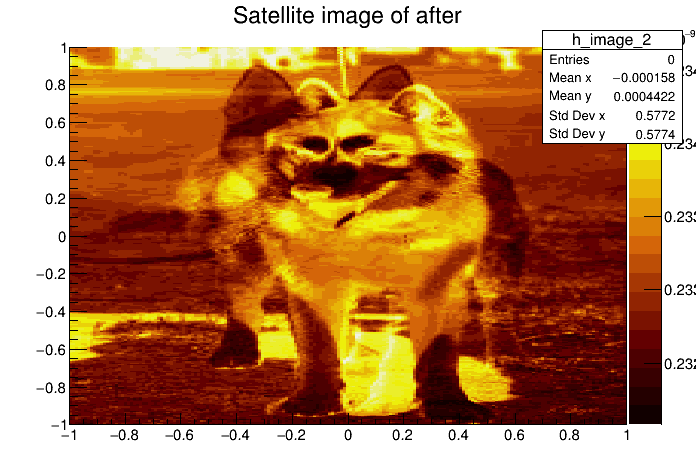

In [16]:
gStyle->SetPalette(53);
h_image_2->Draw("colz");

c1->Draw();

**Done!**